In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys, os, time
import scipy.stats
import pickle
import scipy
sys.path.append('../')
import reionization
from palettable.tableau import Tableau_10
col = Tableau_10.hex_colors

In [4]:
figsize = (5,5)
dpi     = 150

# Observational constraints

In [2]:
Planck18 = {'tau':np.array([0.054]), 'tau_err':np.array([0.007])}

M18a = np.genfromtxt('Mason+18_z=7_xHI_posteriors_pentericci14_N=67.txt', dtype=None, names=True, skip_header=1)
M18a_pxHI_interp = scipy.interpolate.interp1d(M18a['xHI'], M18a['pxHI'], bounds_error=False, fill_value=0.)

M19 = np.genfromtxt('Mason+19_z=8_xHI_posteriors_KLASS.txt', dtype=None, names=True, skip_header=1)
M19_pxHI_interp = scipy.interpolate.interp1d(M19['xHI'], M19['pxHI'], bounds_error=False, fill_value=0.)

H19 = np.genfromtxt('Hoag+19_z=7.6_xHI_posterior.txt', dtype=None, names=True, skip_header=1)
H19_pxHI_interp = scipy.interpolate.interp1d(H19['xHI'], H19['pxHI'], bounds_error=False, fill_value=0.)

D18 = np.genfromtxt('Davies+18_xhi_pdfs.dat', dtype=None, names=['xHI', 'pxHI_71', 'pxHI_75'], skip_header=3)
D18_pxHI_71_interp = scipy.interpolate.interp1d(D18['xHI'], D18['pxHI_71'], bounds_error=False, fill_value=0.)
D18_pxHI_75_interp = scipy.interpolate.interp1d(D18['xHI'], D18['pxHI_75'], bounds_error=False, fill_value=0.)

G19_71 = np.genfromtxt('Greig+19_posteriors_ULASJ1120.txt', dtype=None, names=True)
G19_pxHI_71_interp = scipy.interpolate.interp1d(G19_71['xHI'], G19_71['p_med'], bounds_error=False, fill_value=0.)
G19_75 = np.genfromtxt('Greig+19_posteriors_ULASJ1342.txt', dtype=None, names=True)
G19_pxHI_75_interp = scipy.interpolate.interp1d(G19_75['xHI'], G19_75['p_med'], bounds_error=False, fill_value=0.)

In [3]:
x = np.linspace(0., 1., 100)

pdfs = [np.exp(reionization.lnp_halfnormal(x=x, mu=0.04, sig=0.05, limtype='upper')),
        np.exp(reionization.lnp_halfnormal(x=x, mu=0.06, sig=0.05, limtype='upper')),
        np.exp(reionization.lnp_halfnormal(x=x, mu=0.38, sig=0.20, limtype='upper')),
        M18a_pxHI_interp(x), 
        M19_pxHI_interp(x), 
        H19_pxHI_interp(x), 
        D18_pxHI_71_interp(x),
        D18_pxHI_75_interp(x),
        G19_pxHI_71_interp(x),
        G19_pxHI_75_interp(x)]

labels = ['DF $z=5.6$', 'DF $z=5.9$', 'DF $z=6.1$', 'M18a', 'M19', 'H19', 'D18 z=7.1', 'D18 z=7.5', 'G19 z=7.1', 'G19 z=7.5']

# Plot PDF

Text(0, 0.5, 'PDF')

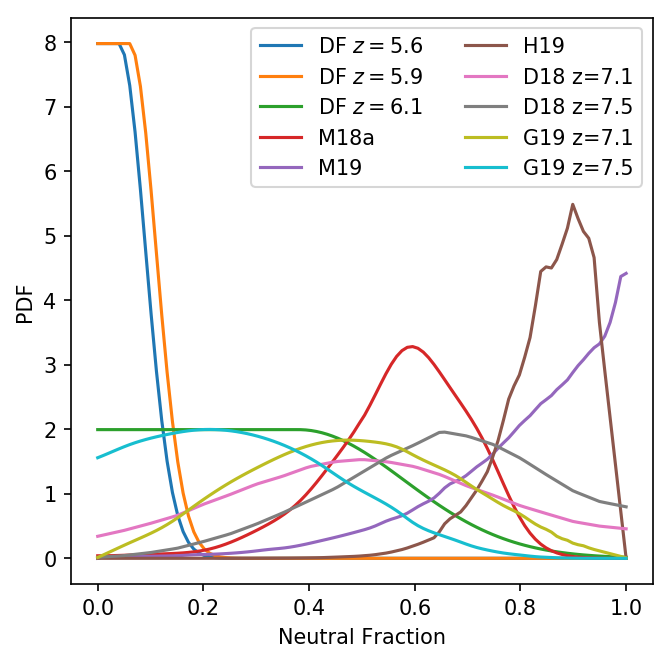

In [5]:
plt.figure(figsize=figsize, dpi=dpi)

for i, p in enumerate(pdfs):
    plt.plot(x, p, label=labels[i], c=col[i])

plt.legend(ncol=2, fontsize=10)
plt.xlabel('Neutral Fraction')
plt.ylabel('PDF')

# Plot CDF

M19: xHI = 0.85_-0.21^+0.11
H19: xHI = 0.86_-0.09^+0.07
D18 z=7.1: xHI = 0.49_-0.25^+0.26
D18 z=7.5: xHI = 0.65_-0.22^+0.19
G19 z=7.1: xHI = 0.47_-0.21^+0.21
G19 z=7.5: xHI = 0.26_-0.18^+0.20


Text(0, 0.5, 'CDF')

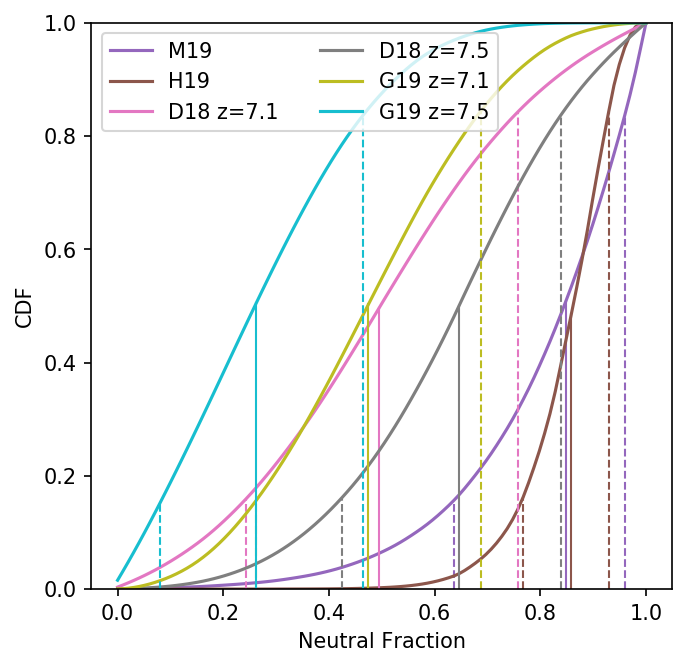

In [6]:
def CDF(x, pdf):
    cdf = np.cumsum(pdf)*np.gradient(x)
    return cdf/cdf.max()

def confidence(x, cdf):
    median = x[np.argmin(np.abs(cdf - 0.5))]
    low    = x[np.argmin(np.abs(cdf - 0.16))]
    high   = x[np.argmin(np.abs(cdf - 0.84))]    
    return median, low, high
    
plt.figure(figsize=figsize, dpi=dpi)

for i, p in enumerate(pdfs):
    if i > 3:
        cdf = CDF(x, p)

        ln = plt.plot(x, cdf, c=col[i], label=labels[i])

        med, l, h = confidence(x, cdf)
        plt.axvline(med, ymin=0, ymax=cdf[x == med], lw=1, c=ln[0].get_color())
        plt.axvline(l, ymin=0,   ymax=cdf[x == l], lw=1, ls='dashed', c=ln[0].get_color())
        plt.axvline(h, ymin=0,   ymax=cdf[x == h], lw=1, ls='dashed', c=ln[0].get_color())
        
        print('%s: xHI = %.2f_-%.2f^+%.2f' % (labels[i], med, med-l, h-med))

plt.ylim(0., 1.)
plt.legend(ncol=2, fontsize=10)
plt.xlabel('Neutral Fraction')
plt.ylabel('CDF')